In [1]:
import os, shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import seaborn as sns

# Load Data


NG_10 = A  
NG_50 = B  
NG_100   = C  
NG_200 = D  
Normal   = E  
PETN_10 = F  
PETN_50   = G  
PETN_100 = H   
PETN_200  = I   
RDX_10   = J  
RDX_50  = K  
RDX_100 = L  
RDX_200 = M  
TNT_10 = N  
TNT_50 = O  
TNT_100 = P  
TNT_200 = Q  

In [2]:
root = "/home/user/effcientNet/explosive/merge_RP_explosive_test"
#testroot = "/home/twogudack/oceanit/LandObserver_OceanIT/Data/육상_test"
A_path = [] #NG
B_path = [] #Normal
C_path = [] #PETN
D_path = [] #RDX
E_path = [] #TNT



def fast_scandir(dirname):
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders

bombTypes = ["NG","Normal","PETN","RDX","TNT"]
bombPaths = [A_path,B_path,C_path,D_path,E_path]

In [3]:
total_path = [s for s in fast_scandir(root) if any(xs for xs in bombTypes)]

for types, pathlist in zip(bombTypes,bombPaths):
    for path in total_path:
        if (types in path):
            imagePath = glob(path+"/*.png")
            for i in imagePath:
                if("textured" not in i):
                    pathlist.append(i)
                    
'''             
for types, pathlist in zip(fishTypes,fishBoxPaths):
    for path in total_path:
        if (types in path) and ("박스" in path):
            imagePath = glob(path+"/*.jpg") + glob(path+"/*.JPG") + glob(path+"/*.jpeg")
            for i in imagePath:
                if("textured" not in i):
                    pathlist.append(i)

    
                    
for types, pathlist in zip(fishTypes,fishNoBoxPaths):
    for path in total_path:
        if (types in path) and ("박스" not in path):
            imagePath = glob(path+"/*.jpg") + glob(path+"/*.JPG") + glob(path+"/*.jpeg")

            for i in imagePath:
                if("textured" not in i):
                    pathlist.append(i)
'''                  
bombPaths = list(map(set, bombPaths))

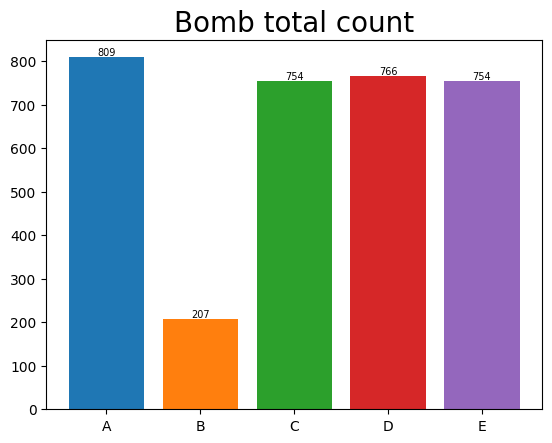

In [4]:
index = ["A","B","C","D","E"] 
bardata = [len(i) for i in bombPaths ] 

plt.title("Bomb total count", fontsize = 20)
plt.bar(index,bardata, color=['tab:blue','tab:orange','tab:green','tab:red',"tab:purple"])
for i, v in enumerate(index):
    plt.text(v, bardata[i], bardata[i], fontsize = 7, color='black',horizontalalignment='center',verticalalignment='bottom')
plt.show()


In [5]:
sumdf = []

    
for num,pecies in enumerate(bombPaths):
    pecies = list(pecies)
    if len(pecies) > 10000:
        pecies = pecies
    label = np.empty_like(pecies)
    label.fill(num)
    a = np.stack([pecies,label],axis = 1)
    df = np.array(a)
    sumdf.append(df)
    #print(sumdf)
    
#extra_data = glob("/home/user/effcientNet/explosive/RP_explosive/*.png")
#print(len(extra_data))
#label = np.empty_like(extra_data)
#label.fill(17)
#a = np.stack([extra_data,label],axis = 1)
#df = np.array(a)
#sumdf.append(df)
        
df = np.vstack(sumdf)
train_df = pd.DataFrame(df,columns = ["file_name","label"])
print(train_df)

                                              file_name label
0     /home/user/effcientNet/explosive/merge_RP_expl...     0
1     /home/user/effcientNet/explosive/merge_RP_expl...     0
2     /home/user/effcientNet/explosive/merge_RP_expl...     0
3     /home/user/effcientNet/explosive/merge_RP_expl...     0
4     /home/user/effcientNet/explosive/merge_RP_expl...     0
...                                                 ...   ...
3285  /home/user/effcientNet/explosive/merge_RP_expl...     4
3286  /home/user/effcientNet/explosive/merge_RP_expl...     4
3287  /home/user/effcientNet/explosive/merge_RP_expl...     4
3288  /home/user/effcientNet/explosive/merge_RP_expl...     4
3289  /home/user/effcientNet/explosive/merge_RP_expl...     4

[3290 rows x 2 columns]


In [6]:
train_df.to_csv('/home/user/effcientNet/explosive/merge_RP_explosive_test/test_df.csv',index=False)

In [7]:
train_df

,file_name,label
0,/home/user/effcientNet/explosive/merge_RP_expl...,0
1,/home/user/effcientNet/explosive/merge_RP_expl...,0
2,/home/user/effcientNet/explosive/merge_RP_expl...,0
3,/home/user/effcientNet/explosive/merge_RP_expl...,0
4,/home/user/effcientNet/explosive/merge_RP_expl...,0
...,...,...
3285,/home/user/effcientNet/explosive/merge_RP_expl...,4
3286,/home/user/effcientNet/explosive/merge_RP_expl...,4
3287,/home/user/effcientNet/explosive/merge_RP_expl...,4
3288,/home/user/effcientNet/explosive/merge_RP_expl...,4
